In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

# print("at directory:", os.getcwd())
# print("changing to root directory")
# os.chdir("../..")
# print("at directory:", os.getcwd())

In [13]:
import jax
# from housemaze.human_dyna import mazes
# from housemaze.human_dyna import utils
# from housemaze.human_dyna import renderer
# from housemaze.human_dyna import utils as dyna_utils
from housemaze.human_dyna import mazes
from housemaze import renderer

from housemaze.human_dyna import multitask_env
from housemaze.human_dyna import experiments
import os.path
import matplotlib.pyplot as plt
import numpy as np

In [9]:
image_dict = utils.load_image_dict()

No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl


In [12]:
char2key, task_group_set, task_objects = mazes.get_group_set(2)
char2key

No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy


{'A': 26, 'B': 40, 'C': 47, 'D': 43, 'E': 25, 'F': 30, 'G': 29, 'H': 27}

((224, 256, 3),
 ['empty', 'wall', 'apple_sliced', 'spoon', 'onion_sliced_cooked'])

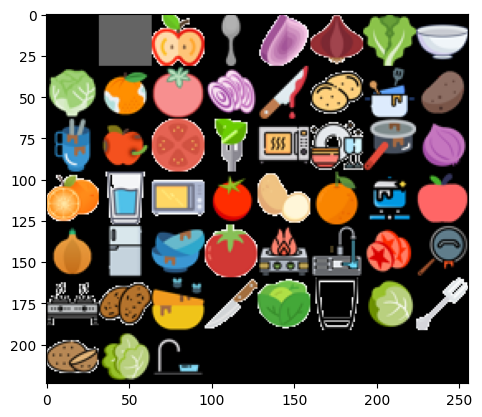

In [15]:
image = renderer.create_image_grid_from_image_tensor(image_dict["images"], max_cols=8)
plt.imshow(image)

image.shape, image_dict["keys"][:5]

In [15]:
task_runner = multitask_env.TaskRunner(task_objects=task_objects)
env = multitask_env.HouseMaze(
    task_runner=task_runner,
    num_categories=200,
  )

No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy


In [76]:
import jax
import numpy as np
train_env_params, test_env_params, task_objects, idx2maze = experiments.exp4({})
jax.tree_map(lambda x: np.asarray(x).shape, train_env_params)

No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy
[(False, False), (False, True), (True, False), (True, True)]
big_m3_maze1 big_m3_maze1
big_m1_maze3 big_m1_maze3_shortcut


EnvParams(reset_params=ResetParams(map_init=MapInit(grid=(12, 18, 26, 1), agent_pos=(12, 2), agent_dir=(12,), spawn_locs=(12, 18, 26, 1)), train_objects=(12, 2), test_objects=(12, 2), starting_locs=(12, 2, 20, 2), curriculum=(12,), label=(12,), randomize_agent=(12,), rotation=(12, 2)), time_limit=(), p_test_sample_train=(), force_room=(), default_room=(), training=(), terminate_with_done=(), randomize_agent=(), randomization_radius=(), task_probs=None)

No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
[[False False]]


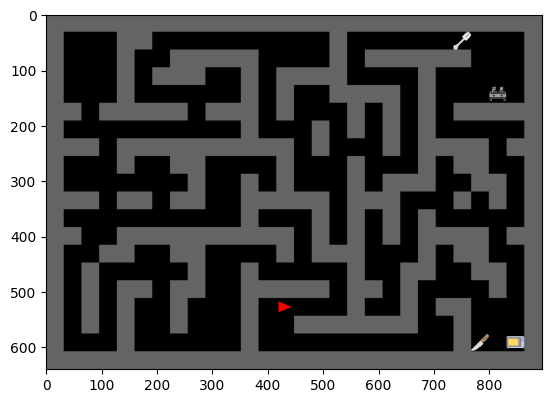

[[False  True]]


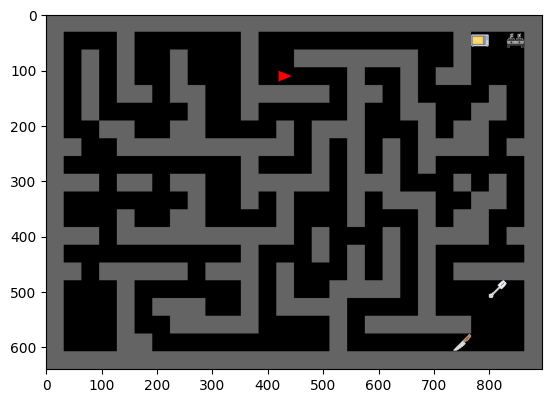

[[ True False]]


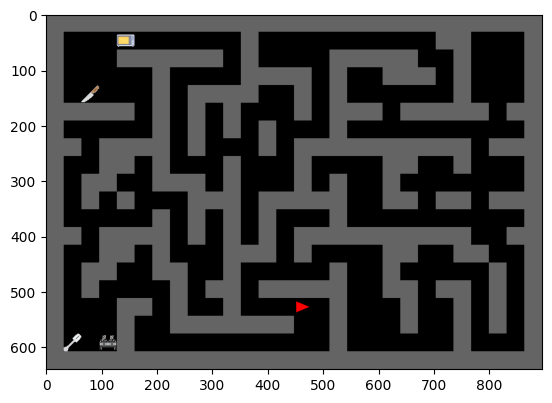

[[ True  True]]


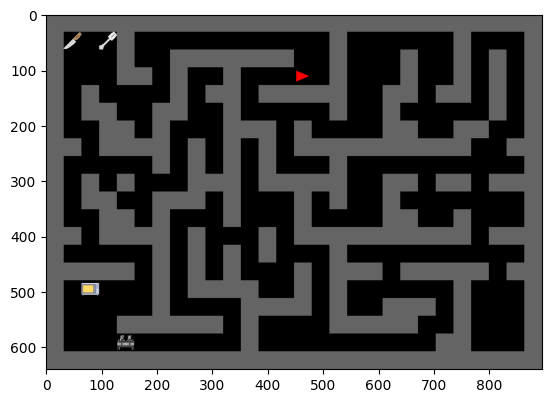

[[False False]]


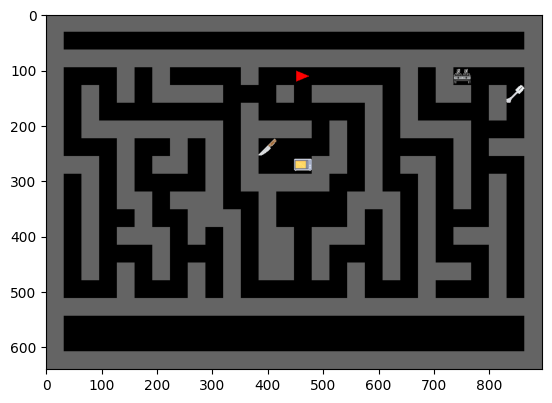

[[False  True]]


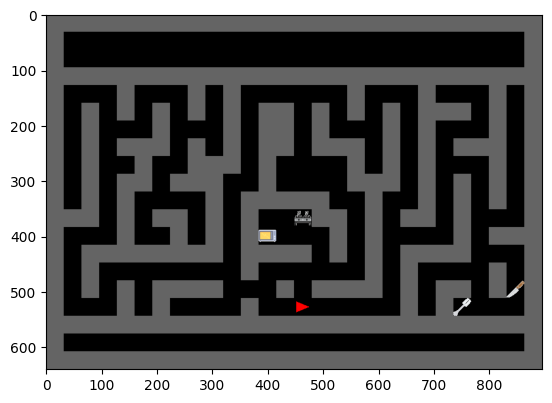

[[ True False]]


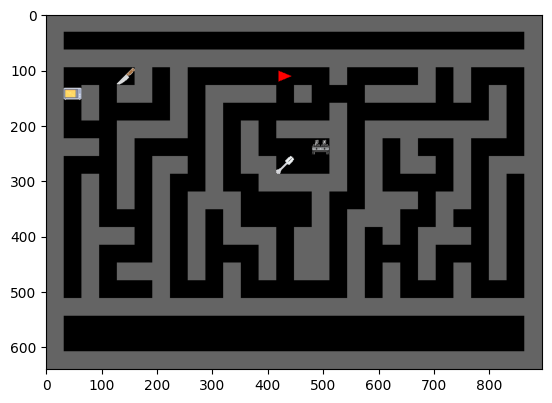

[[ True  True]]


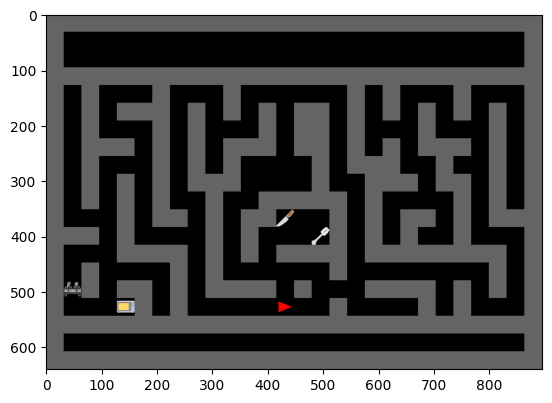

[[False False]]


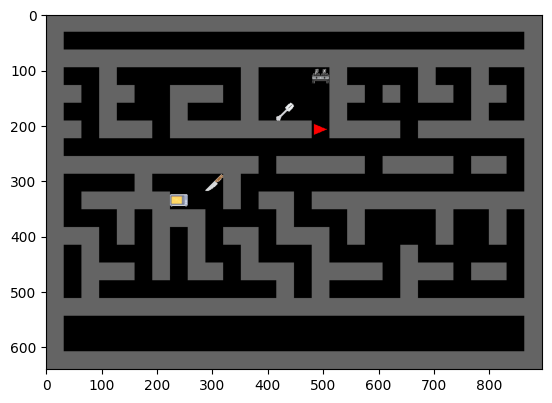

[[False  True]]


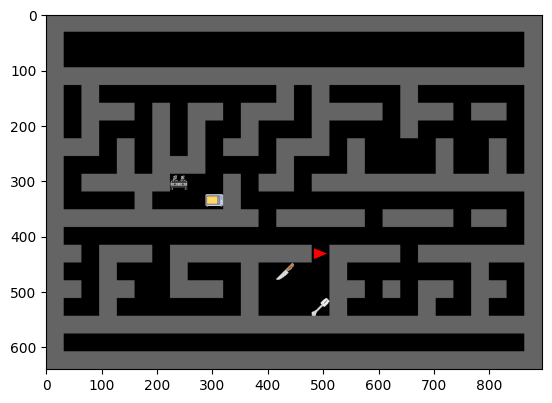

[[ True False]]


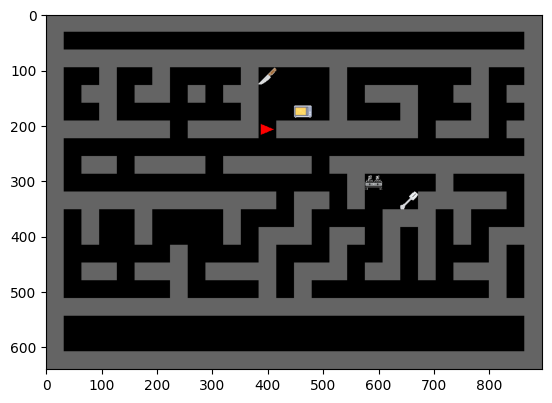

[[ True  True]]


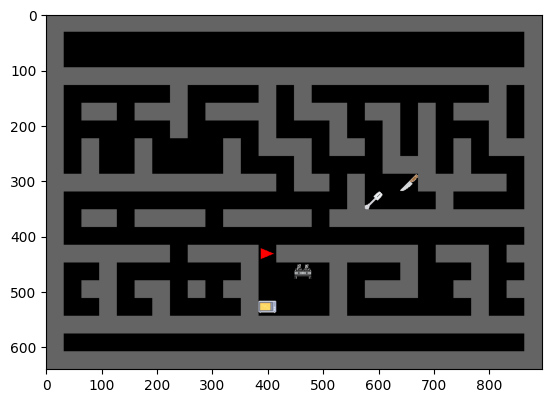

In [77]:
import jax.numpy as jnp
from housemaze.human_dyna import utils

image_data = utils.load_image_dict()
def housemaze_render_fn(
  timestep, include_objects: bool = True
) -> jnp.ndarray:
  image = renderer.create_image_from_grid(
    timestep.state.grid,
    timestep.state.agent_pos,
    timestep.state.agent_dir,
    image_data,
    include_objects=include_objects,
  )
  return image

def display_each_param(param_set):
    n = param_set.reset_params.map_init.grid.shape[0]

    for idx in range(n):
        rng = jax.random.PRNGKey(n)
        reset_params = param_set.reset_params
        
        reset_params = jax.tree_map(lambda x:jnp.asarray(x)[idx], reset_params)
        reset_params = jax.tree_map(lambda x:x[None], reset_params)
        timestep = env.reset(rng, param_set.replace(reset_params=reset_params))
        image = housemaze_render_fn(timestep)
        # print(jax.tree_map(lambda x: np.asarray(x).shape, reset_params))
        print(reset_params.rotation)
        # plt.grid('off')
        plt.imshow(image)
        plt.show()
display_each_param(train_env_params)

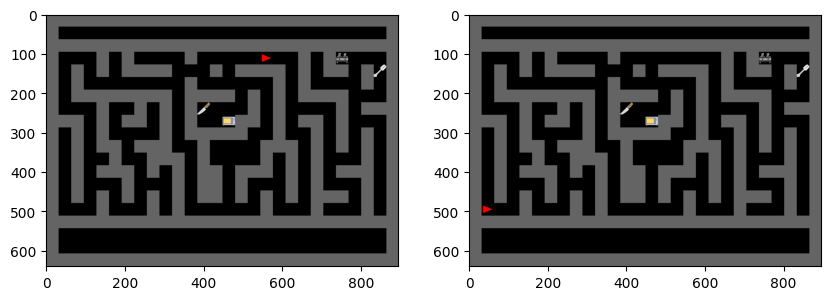

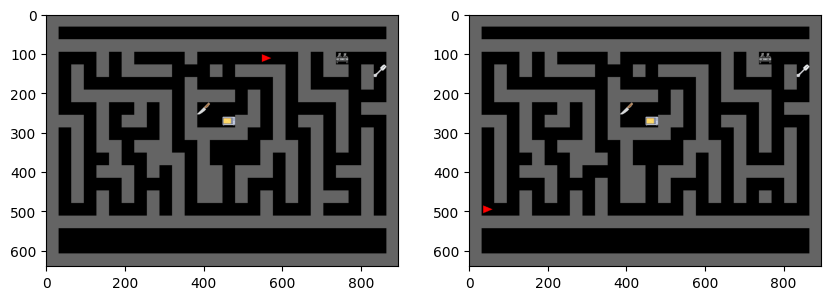

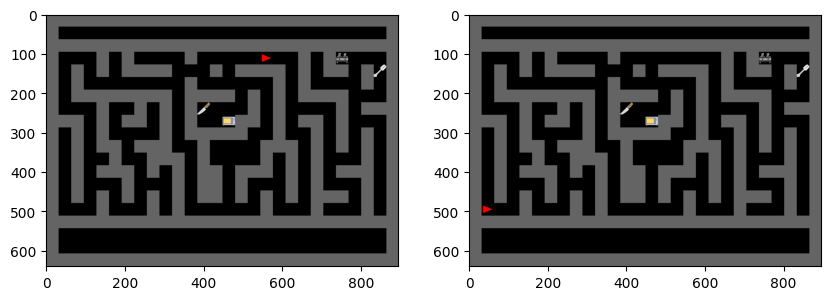

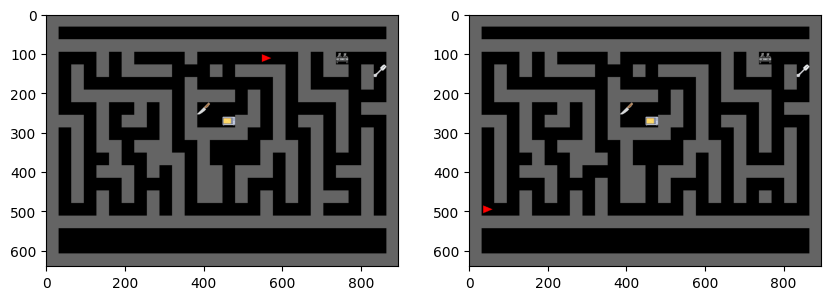

In [66]:
def update_reset_params(param_set, idx):
    reset_params = param_set.reset_params
    
    reset_params = jax.tree_map(lambda x:jnp.asarray(x)[idx], reset_params)
    reset_params = jax.tree_map(lambda x:x[None], reset_params)
    return param_set.replace(reset_params=reset_params)

def display_each_param(param_set, test_param_set):
    n = param_set.reset_params.map_init.grid.shape[0]

    
    for idx in range(n):
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        rng = jax.random.PRNGKey(n)
        train_params = update_reset_params(param_set, idx)
        test_params = update_reset_params(test_param_set, idx)
        # train
        timestep = env.reset(rng, train_params)
        image = housemaze_render_fn(timestep)
        axs[0].imshow(image)
        # test
        timestep = env.reset(rng, test_params)
        image = housemaze_render_fn(timestep)
        axs[1].imshow(image)
        # plt.grid('off')
        plt.show()
display_each_param(train_env_params, test_env_params)

In [16]:
# def render_maze(maze_str):
#   level_init = utils.from_str(maze_str, char2key)
#   image = renderer.create_image_from_grid(*level_init, image_dict)
#   plt.imshow(image)
#   plt.show()


# def render_path(maze_str, goal):
#   level_init = utils.from_str(maze_str, char2key)
#   image = renderer.create_image_from_grid(*level_init, image_dict)
#   path = utils.find_optimal_path(level_init[0], level_init[1], np.array([goal]))
#   print(f"Path length: {len(path)}")
#   actions = utils.actions_from_path(path)
#   renderer.place_arrows_on_image(image, path, actions, *level_init[0].shape[:2])
#   plt.show()


# render_maze(mazes.maze0)
# # render_maze(mazes.maze1)
# # render_maze(mazes.maze2)
# # render_maze(mazes.maze3)
# # render_maze(mazes.maze4)

# Maze 3 Shortcut

Path length: 35


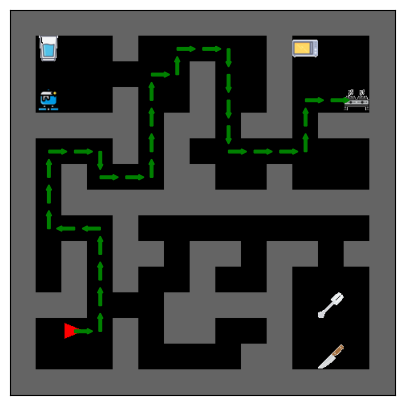

Path length: 21


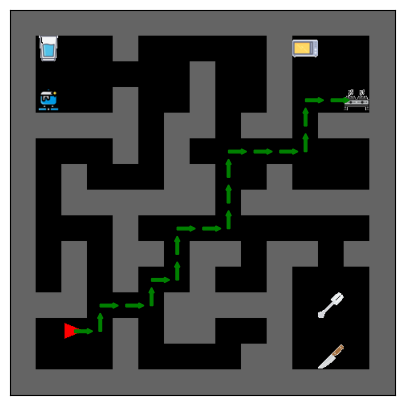

Path length: 29


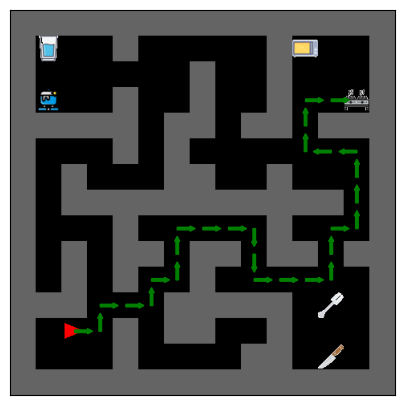

In [48]:
maze3_open = """
E..#.....#A..
......#..#...
F..#..#..#..B
##.#.##.##.##
...#.#.......
.#...##..#...
.###########.
...#......#..
.#.##.##.##.#
.#.#.....#...
##...###.#.C.
.>.#.##......
...#....##.D.
""".strip()

maze3_open2 = """
E..#.....#A..
......#..#...
F..#..#..#..B
####.##.##.##
...#.#.......
.#...##..#...
.###########.
...#.....#...
.#.##.##.##.#
.#.#..#......
##...#####.C.
.>.#.##..#...
...#....##.D.
""".strip()

render_path(mazes.maze3, goal=task_objects[1])
render_path(mazes.maze3_open, goal=task_objects[1])
render_path(mazes.maze3_open2, goal=task_objects[1])

# Plotting offpath

Path length: 35


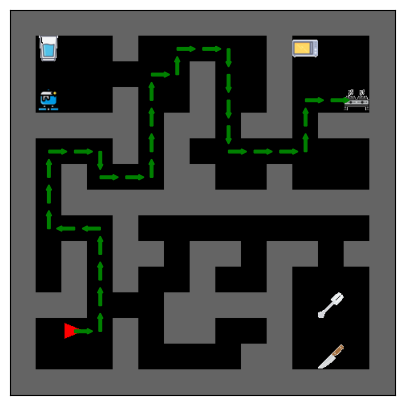

Path length: 27


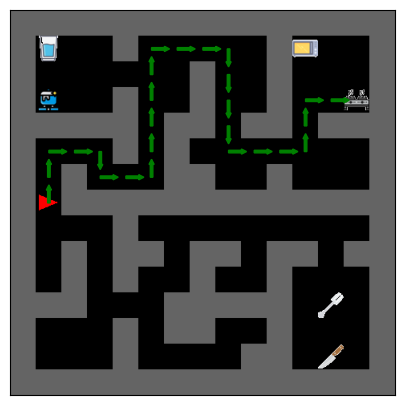

Path length: 27


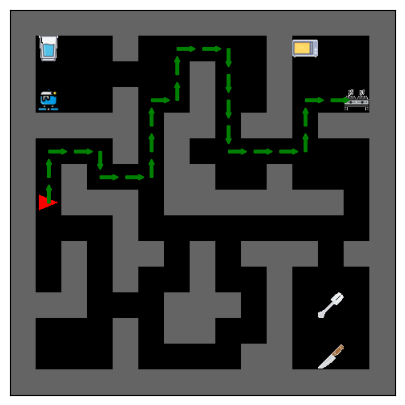

Path length: 23


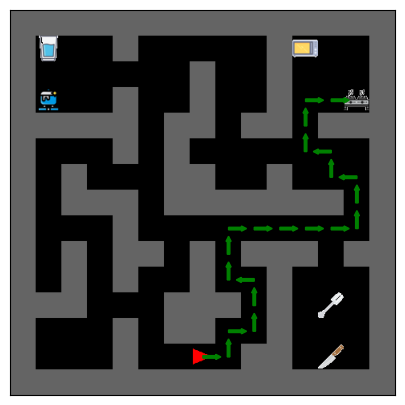

In [29]:
maze3_onpath = """
E..#.....#A..
......#..#...
F..#..#..#..B
####.##.##.##
...#.#.......
.#...##..#...
>############
...#.........
.#.##.##.##.#
.#.#..#..#...
##...#####.C.
...#.##..#...
...#....##.D.
""".strip()

render_path(mazes.maze3, goal=task_objects[1])
render_path(maze3_onpath, goal=task_objects[1])

maze3_onpath_shortcut = """
E..#.....#A..
......#..#...
F..#..#..#..B
####.##.##.##
...#.#.......
.#...##..#...
>###.#######.
...#.........
.#.##.#.###.#
.#.#..#..#...
##...###.#.C.
...#.##..#...
...#....##.D.
""".strip()
render_path(maze3_onpath_shortcut, goal=task_objects[1])

maze3_offpath_shortcut = """
E..#.....#A..
......#..#...
F..#..#..#..B
####.##.##.##
...#.#.......
.#...##..#...
.###.#######.
...#.........
.#.##.#.###.#
.#.#..#..#...
##...###.#.C.
...#.##..#...
...#..>.##.D.
""".strip()
render_path(maze3_offpath_shortcut, goal=task_objects[1])

# Plotting two paths

Path length: 30


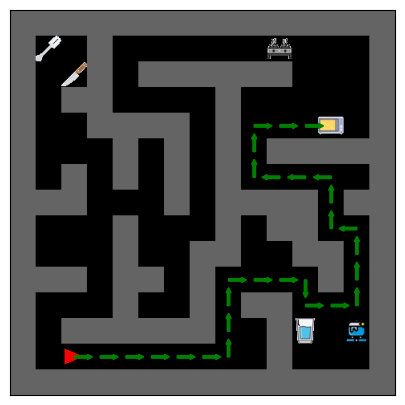

Path length: 31


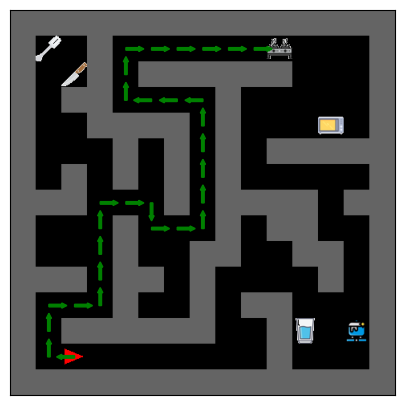

In [92]:
def render_path(maze_str, goal):
  level_init = utils.from_str(maze_str, char2key)
  image = renderer.create_image_from_grid(*level_init, image_dict)
  path = utils.find_optimal_path(level_init[0], level_init[1], np.array([goal]))
  print(f"Path length: {len(path)}")
  actions = utils.actions_from_path(path)
  renderer.place_arrows_on_image(image, path, actions, *level_init[0].shape[:2])
  plt.show()


maze5 = """
C.#......B...
.D#.######...
.##....#.....
..####.#.....
...#.#.#.###A
.#.#.#.#...#.
##...#.###.##
...#...#.#...
...#..##.###.
##.##.#....#.
...#..#.##...
.######..#E.F
.>.......#...
""".strip()

maze5 = mazes.maze5

render_path(maze5, goal=task_objects[0])
render_path(maze5, goal=task_objects[1])


# # offtask = task_objects[1]

In [29]:
level_init[0].shape

(13, 13, 1)